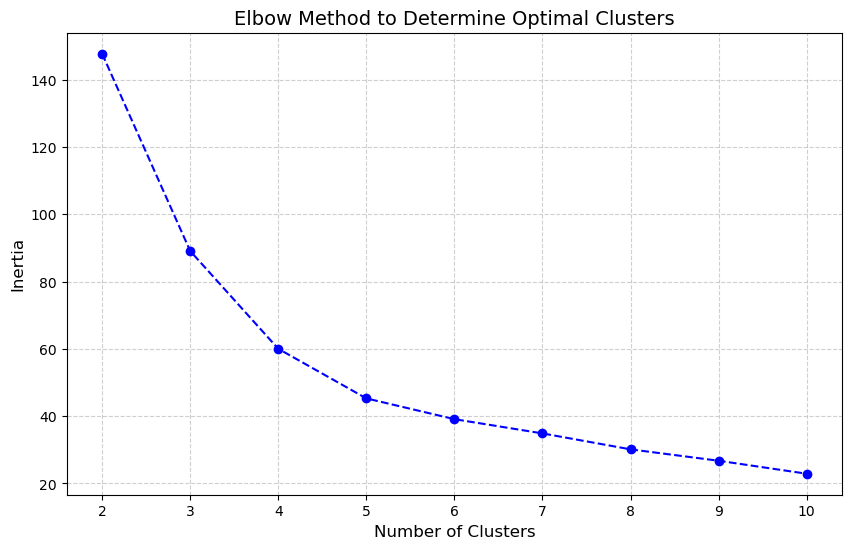

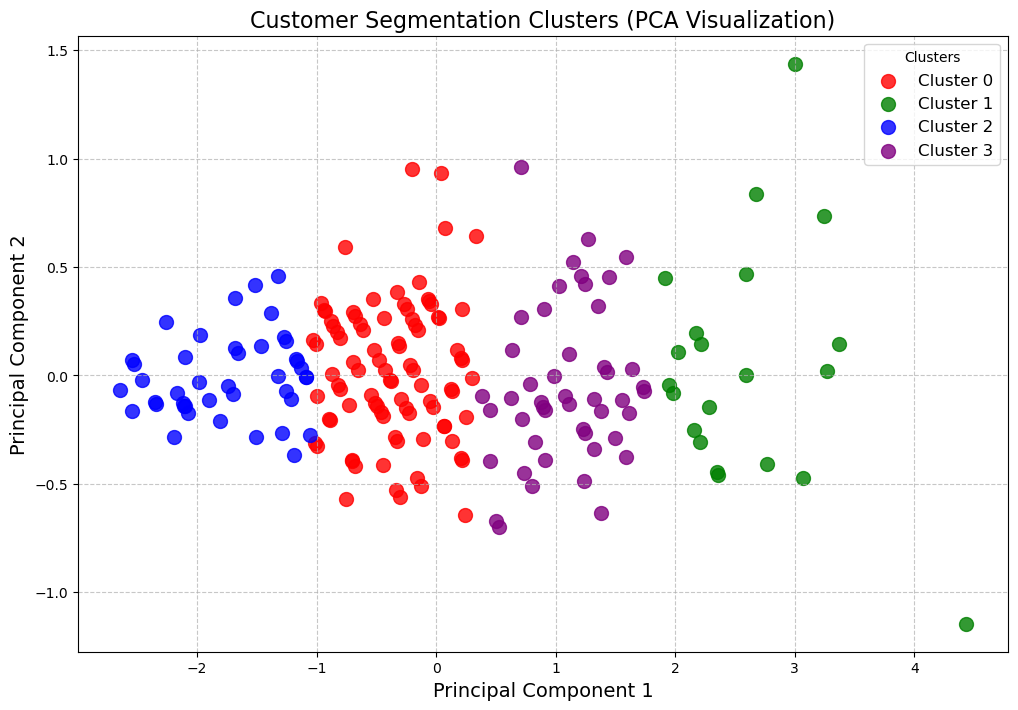

Clustering completed successfully!
Optimal Number of Clusters: 4
Davies-Bouldin Index: 0.72


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import warnings

# Suppress warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Load the datasets
transactions = pd.read_csv('Transactions.csv')
customers = pd.read_csv('Customers.csv')

# Data Preprocessing
# Merge transactions and customers data
merged_data = pd.merge(transactions, customers, on='CustomerID')

# Feature engineering: Aggregate transaction data
customer_summary = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Merge with customer profile data
customer_summary = pd.merge(customer_summary, customers, on='CustomerID')

# Select relevant features for clustering
features = customer_summary[['TotalValue', 'Quantity']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
def plot_elbow(inertia):
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, 11), inertia, marker='o', linestyle='--', color='b')
    plt.title('Elbow Method to Determine Optimal Clusters', fontsize=14)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(range(2, 11))
    plt.show()

plot_elbow(inertia)

# Optimal number of clusters (selected based on the elbow point)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering performance using Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_summary['Cluster'])

# Visualization using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = customer_summary['Cluster']

# Plotting the clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue', 'purple']
for cluster in range(optimal_clusters):
    cluster_data = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', s=100, alpha=0.8, color=colors[cluster])
plt.title('Customer Segmentation Clusters (PCA Visualization)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Clusters', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Save clustering results to a CSV file
customer_summary[['CustomerID', 'Cluster']].to_csv('Jayaprakash_Clustering.csv', index=False)

# Final results output
print("Clustering completed successfully!")
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
